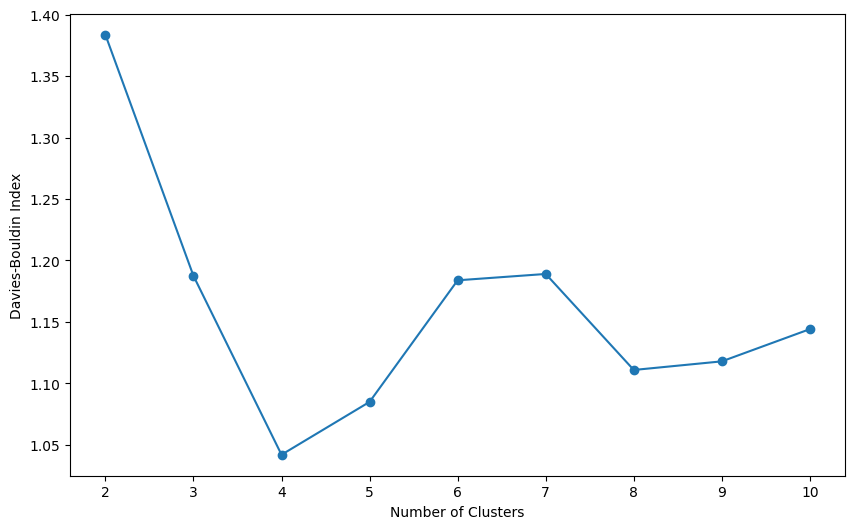

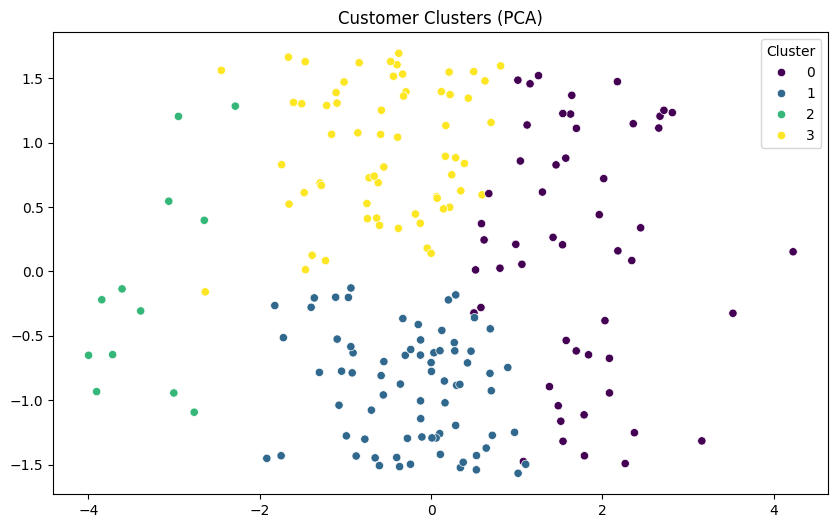

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# Prepare features for clustering
last_transaction = transactions.groupby('CustomerID')['TransactionDate'].max().reset_index()
last_transaction['Recency'] = (pd.to_datetime('today') - pd.to_datetime(last_transaction['TransactionDate'])).dt.days

segmentation_features = customer_features.merge(last_transaction[['CustomerID', 'Recency']], on='CustomerID', how='left')
X = segmentation_features[['TotalSpend', 'PurchaseFrequency', 'Recency', 'Tenure']]

# Scale and impute
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
imputer = SimpleImputer(strategy='mean')
X_scaled_imputed = imputer.fit_transform(X_scaled)

# Find optimal clusters
db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled_imputed)
    db_scores.append(davies_bouldin_score(X_scaled_imputed, kmeans.labels_))

# Plot Davies-Bouldin Index
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# Final clustering
kmeans = KMeans(n_clusters=4, random_state=42).fit(X_scaled_imputed)
segmentation_features['Cluster'] = kmeans.labels_

# Visualize clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_imputed)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=segmentation_features['Cluster'], palette='viridis')
plt.title('Customer Clusters (PCA)')
plt.show()